### 数据集

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    # 冗余特征的数量
    # 冗余特征：可通过其他特征线性组合得到的特征，对分类任务无实际贡献
    n_classes=2,
    n_clusters_per_class=1,
    # 每个类别中的样本仅形成一个簇
    # 一个簇表示数据的一个聚集区域
    random_state=1024
)

In [5]:
x.shape,y.shape

((200, 2), (200,))

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=233,stratify=y)

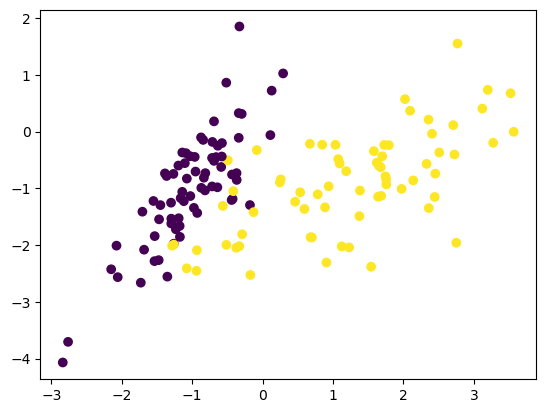

In [7]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

### sklearn中的逻辑回归

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [11]:
clf.score(x_train,y_train)

0.9357142857142857

In [12]:
clf.score(x_test,y_test)

0.95

In [13]:
clf.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [14]:
clf.predict_proba(x_test)
# 输出的是测试集样本属于各个类别的概率
# 每行对应一个样本，每列是对应类别的概率值
# 由于是二分类问题，所以每一行相加等于1

array([[6.16354809e-05, 9.99938365e-01],
       [9.70574901e-01, 2.94250991e-02],
       [1.52971106e-02, 9.84702889e-01],
       [9.66935836e-01, 3.30641638e-02],
       [7.08449171e-02, 9.29155083e-01],
       [1.04894437e-01, 8.95105563e-01],
       [6.91772786e-03, 9.93082272e-01],
       [2.84232933e-02, 9.71576707e-01],
       [2.30381015e-02, 9.76961899e-01],
       [8.18393626e-01, 1.81606374e-01],
       [8.00064923e-03, 9.91999351e-01],
       [1.05251820e-01, 8.94748180e-01],
       [9.65353903e-01, 3.46460966e-02],
       [9.03818739e-01, 9.61812611e-02],
       [8.57742151e-01, 1.42257849e-01],
       [8.62158334e-01, 1.37841666e-01],
       [8.18356847e-01, 1.81643153e-01],
       [9.89882070e-03, 9.90101179e-01],
       [9.58180589e-01, 4.18194115e-02],
       [9.23030797e-01, 7.69692026e-02],
       [7.92699729e-01, 2.07300271e-01],
       [1.59118103e-01, 8.40881897e-01],
       [5.18411945e-01, 4.81588055e-01],
       [9.07050697e-01, 9.29493034e-02],
       [2.517857

In [15]:
np.argmax(clf.predict_proba(x_test),axis=1)
# np.argmax：用于获取数组中最大的索引
# 在二分类场景下索引0对应类别0，索引1对应类别1
# 因此这行代码的最终作用是：根据概率结果，得到测试样本的预测类别标签

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

### 超参数

In [17]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = [{
    'penalty':['l1','l2'],
    # penalty:指定正则化类型
    # L1：权重绝对值和，可使部分权重为0，用于特征选择
    # L2：权重平方和，常用于防止过拟合
    'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],
    # C：正则化强度的倒数值越小，正则化约束越强（限制权重幅度）
    'solver':['liblinear']
    # solver：优化算法
    # liblinear：适用于小数据集，支持L1、L2正则化
},{
    # 'penalty':['none'],
    # 'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],
    # 'solver':['lbfgs']
    ## 处理二分类问题，不支持L1正则化
    # The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'l2'} or None. Got 'none' instead.
},{
    'penalty':['elasticnet'],
    'C':[0.0001,0.001,0.01,0.1,1,10,100,1000],
    'l1_ratio':[0,0.25,0.5,0.75,1],
    # 仅在'penalty'='elasticent'时生效，控制L1、L2正则化的混合比例（0为纯L2，1为纯L1）
    'solver':['saga'],
    # 支持大规模数据，适配'elasticent'正则化
    'max_iter':[200]
    # 算法最大迭代次数，避免因为不收敛而无限运行
}]

In [32]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    n_jobs=-1,
    error_score='raise'
)

In [34]:
grid.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [36]:
grid.best_score_

0.95

In [42]:
grid.best_estimator_.score(x_test,y_test)

0.9333333333333333

In [48]:
grid.best_params_

{'C': 1,
 'l1_ratio': 0.75,
 'max_iter': 200,
 'penalty': 'elasticnet',
 'solver': 'saga'}